In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [44]:
df = pd.read_csv("downloads\height-weight.csv")

In [45]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

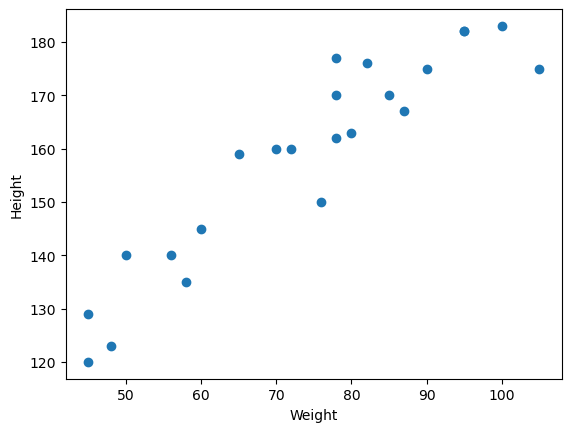

In [46]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel("Height")

In [47]:
X,Y = df[['Weight']], df[['Height']]

In [48]:
X,Y

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
     Height
 0      120
 1      135
 2      123
 3      145
 4      160
 5      162
 6      163
 7      175
 8      182
 9      170
 10     176
 11     182
 12     175
 13     183
 14     170
 15     177
 16     140
 17     159
 18     150
 19     167
 20     129
 21     140
 22     160)

In [49]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20)

In [51]:
X.shape

(23, 1)

In [52]:
X_train.shape, Y_test.shape

((18, 1), (5, 1))

In [54]:
#step 3 

#standardize the data

In [ ]:
Where ever there is a distance based algorithm is there we need to do standardization. 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [64]:
X_train

,Weight
0,45
19,87
22,72
13,100
16,50
6,80
7,90
11,95
5,78
15,78


In [ ]:
For Training Data do fit and transform 
and for test data do only transform 

Reason : The model should not know anything about the test data. 

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train

array([[-1.54828181],
       [ 0.93159329],
       [ 0.04592361],
       [ 1.69917368],
       [-1.25305858],
       [ 0.51828077],
       [ 1.10872723],
       [ 1.40395045],
       [ 0.40019148],
       [ 0.40019148],
       [ 0.40019148],
       [ 0.813504  ],
       [-0.07216568],
       [-1.54828181],
       [-0.3673889 ],
       [-0.66261213],
       [-0.89879071],
       [-1.37114787]])

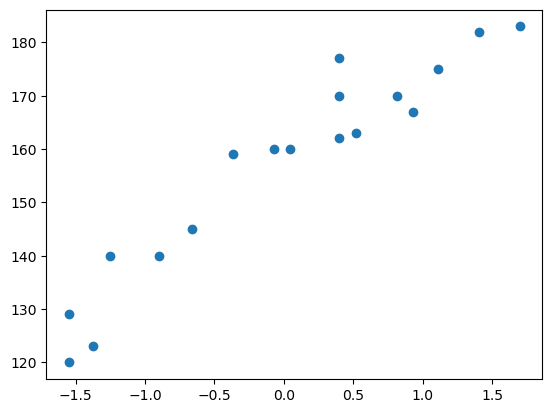

In [67]:
plt.scatter(X_train,Y_train)

In [68]:
# Train the Model (Simple Linear regression model)


In [69]:
from sklearn.linear_model import LinearRegression 

In [70]:
regressor = LinearRegression()

In [71]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [75]:
print("the slope or coefficient of weight is ", regressor.coef_)
print("Intercept",regressor.intercept_)

the slope or coefficient of weight is  [[18.2455243]]
Intercept [156.94444444]


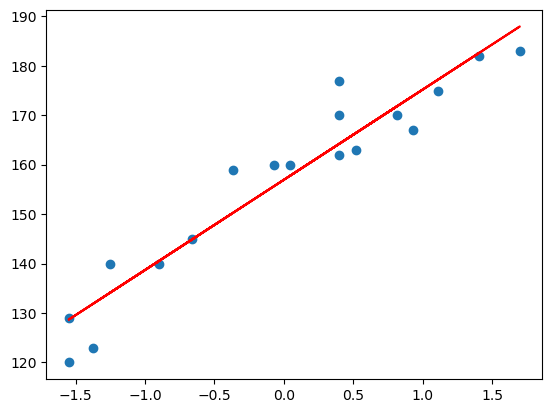

In [78]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),color = 'r')

# Prediction of the train data

1. Predicted height and output =  intercept + coef(weights)
2. Y_pred_test = 65.4364 + 1.2

#Prediction of test data 
1. Predicted height output = intercept + coef_(weights)
2. Y_pred_test = 

In [79]:
Y_pred_test = regressor.predict(X_test)

In [80]:
Y_pred_test

array([[182.56025652],
       [162.09154687],
       [168.55534992],
       [142.70013773],
       [193.3332616 ]])

In [81]:
Y_pred_test, Y_test

(array([[182.56025652],
        [162.09154687],
        [168.55534992],
        [142.70013773],
        [193.3332616 ]]),
     Height
 8      182
 18     150
 10     176
 1      135
 12     175)

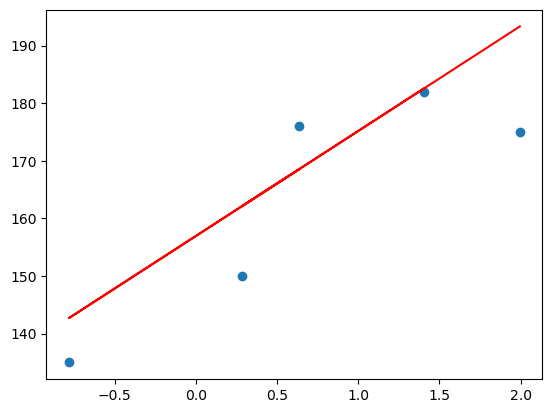

In [91]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred_test,'r')

In [92]:
# Performance Metrics

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [96]:
mse = mean_squared_error(Y_test,Y_pred_test)

In [97]:
mse

119.46856197230754

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2 = r2_score(Y_test,Y_pred_test)

In [101]:
r2

0.6324496616653102

In [103]:
1 - (1-r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

0.5099328822204137

In [105]:
scaled_weight = scaler.transform([[80]])

C:\Users\nitesh.sethia\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [106]:
scaled_weight

array([[0.51828077]])

In [109]:
regressor.predict ([scaled_weight[0]])

array([[166.4007489]])

In [110]:
residuals = Y_test - Y_pred_test

In [111]:
residuals

,Height
8,-0.560257
18,-12.091547
10,7.444650
1,-7.700138
12,-18.333262


C:\Users\nitesh.sethia\AppData\Local\Temp\ipykernel_4316\4081768211.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = True)
C:\Users\nitesh.sethia\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

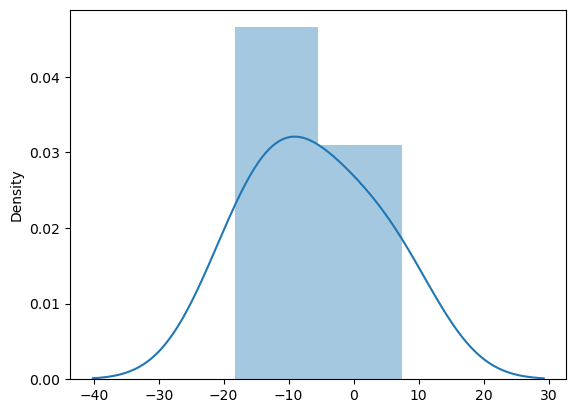

In [113]:
import seaborn as sns
sns.distplot(residuals,kde = True)